# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv("../data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
#The goal is to see if percentage of instruction 
#expenditure on state revenue will effect Grade 4 math scores
#So, we will filter out all rows or data points without our input variables
print(df[['STATE', 'STATE_REVENUE', 'INSTRUCTION_EXPENDITURE', 'AVG_MATH_4_SCORE']].isna().sum())
print(df.shape)
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
df.dropna(subset=['STATE_REVENUE'], inplace=True)
df.dropna(subset=['INSTRUCTION_EXPENDITURE'], inplace=True)
print(df.shape)

STATE                         0
STATE_REVENUE               440
INSTRUCTION_EXPENDITURE     440
AVG_MATH_4_SCORE           1150
dtype: int64
(1715, 25)
(440, 25)


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: AVG_MATH_4_SCORE

How many years of data are logged in our dataset? 

In [4]:
#using my "clean" dataset, we have 440 points of data, which ranges from 1992 to 2015
#This covers 23 years
print(df['YEAR'].max())
print(df['YEAR'].min())
print(df['YEAR'].max() - df['YEAR'].min())

2015
1992
23


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [5]:
df_ = df.set_index('STATE')
print("Ohio: ", df_.loc['OHIO', 'AVG_MATH_4_SCORE'].mean())
print("Michigan: ", df_.loc['MICHIGAN', 'AVG_MATH_4_SCORE'].mean())
# Michigan has had the highest outcome on average across all years!

Ohio:  239.11111111111111
Michigan:  234.0


Find the average for your outcome score across all states in 2019

In [6]:
#The year 2019 does not appear in out dataset from our clean up earlier
#However, we can find the average of our outcome score in 2015, witch is shown here
df[(df.loc[:, 'YEAR'] == 2015)]['AVG_MATH_4_SCORE'].mean()

240.27450980392157

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [7]:
stateGroup = df.groupby('STATE')
stateGroup['AVG_MATH_4_SCORE'].mean()

STATE
ALABAMA                 225.000000
ALASKA                  235.857143
ARIZONA                 229.777778
ARKANSAS                231.111111
CALIFORNIA              226.666667
COLORADO                238.875000
CONNECTICUT             239.666667
DELAWARE                237.125000
DISTRICT_OF_COLUMBIA    212.888889
FLORIDA                 237.000000
GEORGIA                 231.555556
HAWAII                  230.777778
IDAHO                   236.111111
ILLINOIS                234.875000
INDIANA                 240.111111
IOWA                    239.666667
KANSAS                  243.250000
KENTUCKY                232.444444
LOUISIANA               225.888889
MAINE                   239.888889
MARYLAND                236.111111
MASSACHUSETTS           245.555556
MICHIGAN                234.000000
MINNESOTA               244.222222
MISSISSIPPI             223.666667
MISSOURI                235.444444
MONTANA                 240.250000
NEBRASKA                236.444444
NEVADA        

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [8]:
df['state_Spending_Percentage'] = df['INSTRUCTION_EXPENDITURE']/df['STATE_REVENUE']

Feature engineering justification: There may be a correlation between how much a state may value education, measured by the ratio of state revenue and instruciton expenditure, and student performance.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<AxesSubplot:xlabel='state_Spending_Percentage', ylabel='AVG_MATH_4_SCORE'>

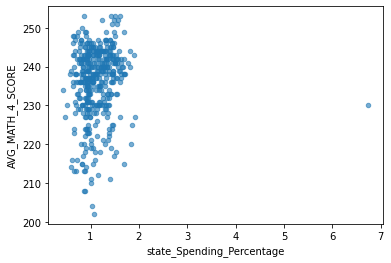

In [9]:
df.plot.scatter(x="state_Spending_Percentage", y="AVG_MATH_4_SCORE", alpha = 0.6)

Scatter plot between the ratio of state revenue and instructor spending and Grade 4 Math score. There does not seem to be any correlation. There is one strange outlier. 

**Visualization 2**

<AxesSubplot:xlabel='AVG_READING_8_SCORE', ylabel='AVG_MATH_4_SCORE'>

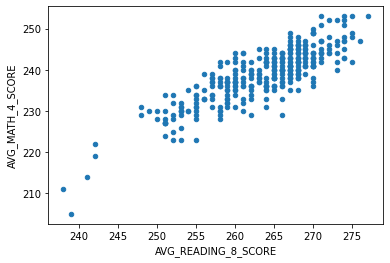

In [10]:
df.plot.scatter(x="AVG_READING_8_SCORE", y="AVG_MATH_4_SCORE")

Scatter plot between Grade 8 reading score and Grade 4 Math score. There does seem to be a strong correlation.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df[['AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']
y.fillna(y.median(), inplace=True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=.3, random_state=42)


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [14]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [15]:
# create your model here
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [22]:
print(np.mean(model.predict(X_test)-y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))

0.5434640599229508
2.8860775543237676


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

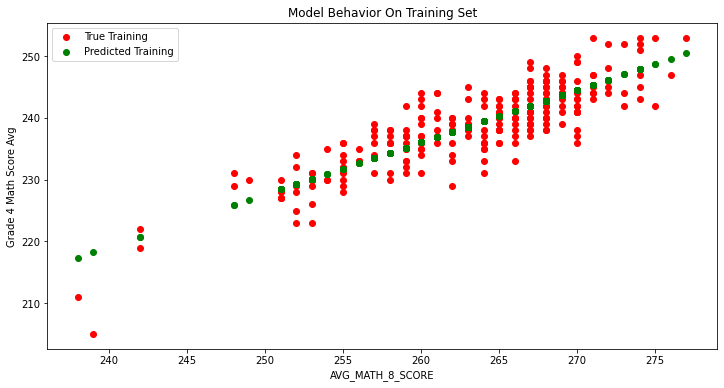

In [26]:
col_name = 'COLUMN NAME OF ONE PREDICTOR'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train['AVG_READING_8_SCORE'], y_train, color = "red")
plt.scatter(X_train['AVG_READING_8_SCORE'], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel('AVG_READING_8_SCORE')
plt.ylabel('Grade 4 Math Score Avg')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

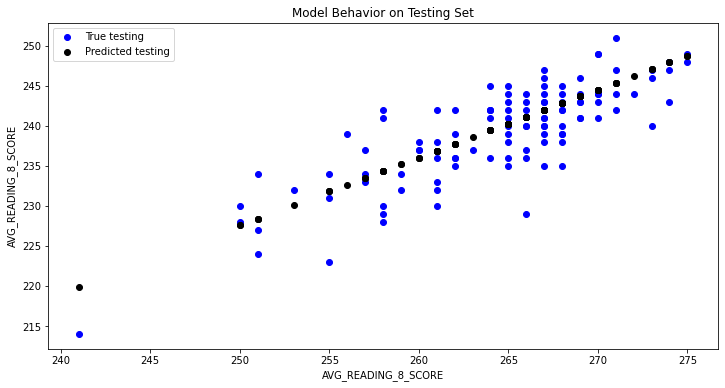

In [29]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_8_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

My added feature had very poor correlation with the score of students. So in order to get practice with training a model, I pivoted to a different variable. The model looks like it matches well with the data, but it is very different than what is shown in the tutorial which I do not know why. It looks like a straight line.